### Import modules

In [1]:
from numpy import quantile, where, random
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = (13, 7)
import pandas as pd
import numpy as np

### Import the labelled dataset and plot it  

In [2]:
df = pd.read_csv('labelled_data_sample.csv')
df[['time']] = df[['time']].apply(pd.to_datetime)
df.rename(columns = {'Unnamed: 0':'x_column' }, inplace = True)


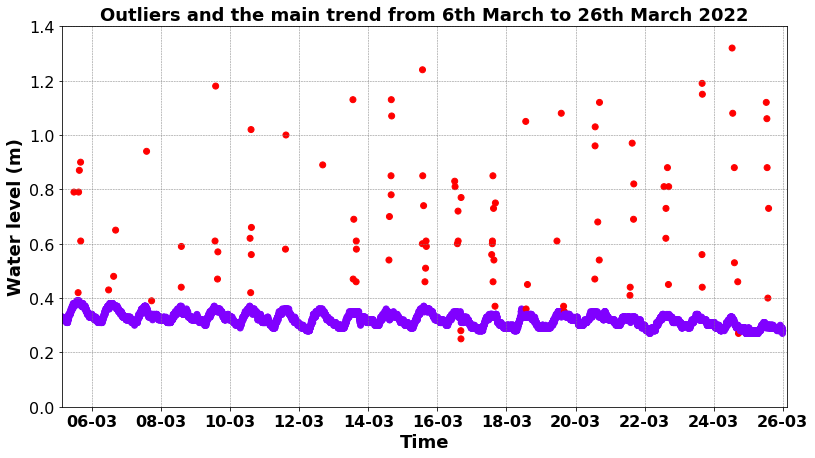

In [4]:
plt.rcParams['figure.figsize'] = (13, 7)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
ax.scatter(df['time'],df['height'], c= df['datapoint_label'], cmap='rainbow')
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
ax.set_title('Outliers and the main trend from 6th March to 26th March 2022', fontsize=18,weight='bold')
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-03-06 00:00:00'],['2022-03-26 23:59:59'])
ax.set_ylim(0, 1.4)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.set(facecolor = "white")

#plt.savefig('sample_photo.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

## Minimum Covariance determinant from SCIKIT-LEARN 

In [5]:
from sklearn.covariance import EllipticEnvelope
import datetime as datetime
water_level = np.array(df['height']).reshape(-1, 1)

### Model fitting 

In [6]:
mcd_model = EllipticEnvelope(contamination=0.016)
model_scores = mcd_model.fit_predict(water_level)
model_scores

array([1, 1, 1, ..., 1, 1, 1])

In [7]:
surprise_index = list(model_scores)

In [8]:
surprise_list = surprise_index
clusters =[]
for i in surprise_list:
    if i == 1:
        cluster = 0
    else:
        cluster = 1
    clusters.append(cluster) 
    p = clusters

In [9]:
df['mcd_labels'] = p
df.to_csv ('mcd_output.csv', header=True,index = False)

In [10]:
temp_df = df.loc[(df['mcd_labels'] == 0)]
df3 = temp_df.set_index('time')
df4 = df3.reset_index()

In [11]:
temp_df1 = df.loc[(df['mcd_labels'] == 1)]
df5 = temp_df1.set_index('time')
df6 = df5.reset_index()

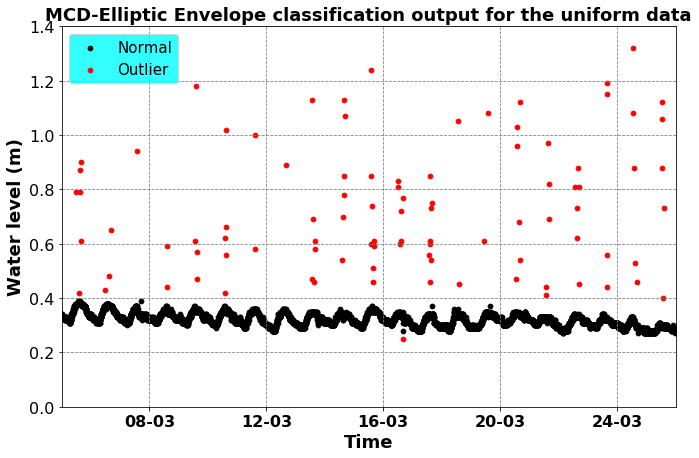

In [12]:
plt.rcParams['figure.figsize'] = (11, 7)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
Normal = ax.scatter(df4['time'],df4['height'], c ="black", marker="o", s = 10**1.35)
Outlier = ax.scatter(df6['time'],df6['height'], c ="red",marker ="o", s = 10**1.35)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_title('MCD-Elliptic Envelope classification output for the uniform data', fontsize=18, weight='bold')
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-03-5 20:59:59'],['2022-03-26 20:59:59'])
ax.set_ylim(0, 1.4)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.legend(["Normal", "Outlier"], loc ="upper left", fancybox=True,facecolor='#01FFFF',prop={'size': 15,  'style': 'normal'})
ax.set(facecolor = "white")
plt.savefig('mcd_normal.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

### MODEL METRICS 

In [13]:
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
data_labels = list(df['datapoint_label'])
mcd_labels = list(df['mcd_labels'])

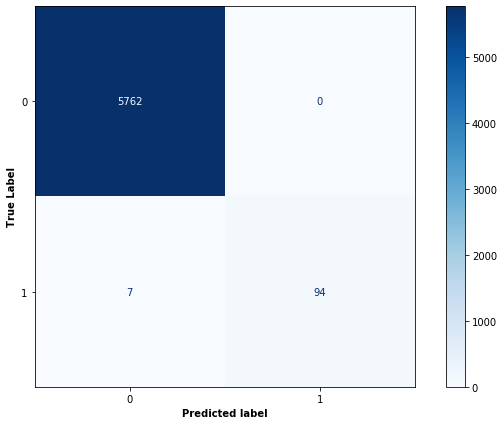

In [14]:
c_matrix = confusion_matrix (data_labels,mcd_labels)
disp = ConfusionMatrixDisplay(c_matrix )
disp.plot(cmap=plt.cm.Blues,values_format='g',)
plt.xlabel('Predicted label', weight = 'bold')
plt.ylabel('True Label', weight = 'bold')


plt.savefig('con1.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

In [15]:
data_accuracy = accuracy_score (data_labels,mcd_labels)
data_accuracy

0.9988060719768037

In [16]:
data_precision = precision_score (data_labels,mcd_labels)
data_precision

1.0

In [17]:
data_recall_score = recall_score (data_labels,mcd_labels)
data_recall_score

0.9306930693069307

In [18]:
data_f1_score = f1_score (data_labels,mcd_labels)
data_f1_score

0.9641025641025642

In [19]:
x = ['Accuracy', 'Precision', 'Recall', 'F1_score']
y = [data_accuracy, data_precision, data_recall_score,data_f1_score ]

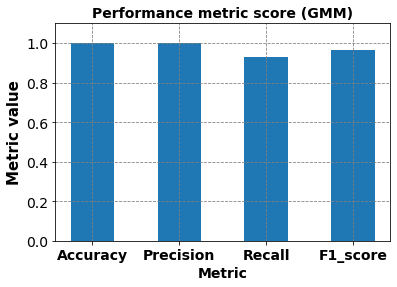

In [20]:
plt.rcParams['figure.figsize'] = (6, 4)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
ax.bar(x, y, width=0.5)
ax.grid(color = 'gray', linestyle = '--', linewidth = 0.8)
ax.set_title('Performance metric score (GMM)', fontsize=14, weight='bold')
ax.set_xlabel('Metric', fontsize=14, weight = 'bold')
ax.set_ylabel('Metric value', fontsize=15, weight = 'bold')
ax.set_ylim(0, 1.1)
ax.set_xticklabels(x, fontsize=12, weight='bold')
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x',which='major', labelsize=14)

## Define the date format
ax.set(facecolor = "white")
plt.savefig('bar1.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()